<a href="https://colab.research.google.com/github/Nanda-gi/yt-comment-sentiment-analysis/blob/master/Anamoly_detection_using_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
!wget https://timeseriesclassification.com/aeon-toolkit/ECG5000.zip

--2025-01-24 10:44:04--  https://timeseriesclassification.com/aeon-toolkit/ECG5000.zip
Resolving timeseriesclassification.com (timeseriesclassification.com)... 212.78.75.243
Connecting to timeseriesclassification.com (timeseriesclassification.com)|212.78.75.243|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  7.72MB/s    in 1.3s    

2025-01-24 10:44:06 (7.72 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



In [ ]:
!unzip ECG5000.zip

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [ ]:
! cat ECG5000_TRAIN.txt ECG5000_TEST.txt >ecg500_final.txt

In [ ]:
!head ecg500_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [ ]:
df=pd.read_csv("ecg500_final.txt",sep="\s+",header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,...,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,...,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,...,0.459127,0.403937,0.298191,0.461101,0.664659,0.587757,0.701325,0.917205,1.247987,1.505568,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,-0.653949,-0.566916,-0.524045,-0.414711,-0.387787,-0.284437,-0.072745,-0.160125,-0.092160,...,0.414661,0.371639,0.445170,0.484170,0.556061,0.658724,0.861158,1.016397,1.135606,1.216973,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425

In [ ]:
df=df.add_prefix("C")

In [ ]:
df['C0'].value_counts()

,count
C0,
1.0,2919
2.0,1767
4.0,194
3.0,96
5.0,24


In [ ]:
df.describe()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,-0.586326,-0.434430,-0.337621,-0.258235,-0.184443,-0.120015,-0.070396,-0.041849,-0.037049,-0.041243,-0.048908,-0.060176,-0.070725,-0.085491,-0.101144,-0.116070,-0.134461,-0.155811,-0.177542,-0.200685,-0.224244,-0.246686,-0.271476,-0.290321,-0.304461,-0.315111,-0.316851,-0.313070,-0.303238,-0.287315,-0.261244,-0.227944,-0.190993,-0.150814,-0.108084,-0.069482,-0.035765,-0.008621,0.013246,...,0.440115,0.442589,0.450790,0.466075,0.495508,0.540780,0.602076,0.671297,0.750998,0.842444,0.946527,1.051337,1.138071,1.187551,1.201909,1.190866,1.154605,1.086347,0.986863,0.864419,0.720300,0.570000,0.428955,0.319734,0.242586,0.181059,0.134708,0.109781,0.093630,0.081028,0.065780,0.047326,0.025409,0.004531,-0.009790,-0.019087,-0.026208,-0.029561,0.000637,0.086588,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,0.592049,0.493606,0.426206,0.393553,0.382488,0.386315,0.400830,0.415267,0.423797,0.429734,0.434976,0.441768,0.447727,0.454600,0.461603,0.472726,0.483574,0.492048,0.503468,0.516169,0.530030,0.543061,0.552285,0.560649,0.564906,0.566459,0.560789,0.548964,0.536229,0.517508,0.494600,0.469321,0.437137,0.402690,0.370530,0.339816,0.312688,0.290779,0.275701,...,0.243031,0.251540,0.260888,0.273504,0.285234,0.304211,0.332687,0.371989,0.411086,0.461256,0.520027,0.574633,0.614855,0.623050,0.608319,0.582721,0.553923,0.531272,0.507226,0.485600,0.483479,0.511334,0.546391,0.565580,0.571998,0.573798,0.584480,0.589680,0.591613,0.597117,0.603953,0.610288,0.619812,0.633101,0.649239,0.667657,0.680713,0.693871,0.751844,0.920052,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,-4.040526,-3.724538,-3.264576,-3.222345,-3.263484,-3.219212,-3.202187,-3.147504,-3.459917,-4.102102,-4.311241,-4.099888,-3.614973,-3.822298,-3.795567,-3.690817,-3.542485,-3.631665,-3.587112,-3.452215,-4.074752,-4.137454,-4.059662,-3.626646,-2.829471,-3.585866,-4.003401,-3.900724,-3.325329,-3.911093,-4.862443,-4.710268,-4.238206,-4.247936,-3.892782,-3.135950,-3.0

In [ ]:
y=df.iloc[:,0:1]
x=df.iloc[:,0:df.shape[1]]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Scalar=MinMaxScaler()

In [ ]:
Scalar.fit(x_train)

MinMaxScaler()

In [ ]:
train_scaled=Scalar.transform(x_train)
test_scalar=Scalar.transform(x_test)

In [ ]:
scale_train_df=pd.DataFrame(train_scaled)

In [ ]:
normal_train=scale_train_df.add_prefix("C").query('C0==0.00').values[:,1:]
anamoly_train=scale_train_df.add_prefix("C").query('C0!=0.00').values[:,1:]

In [ ]:
anamoly_train.shape

(1667, 140)

In [ ]:
scale_test_df=pd.DataFrame(test_scalar)

In [ ]:
normal_test=scale_test_df.add_prefix("C").query('C0==0.00').values[:,1:]
anamoly_test=scale_test_df.add_prefix("C").query('C0!=0.00').values[:,1:]

In [ ]:

normal_train.shape
normal_test.shape

(586, 140)

In [ ]:
normal_train[0]

array([0.317557  , 0.18654775, 0.09989901, 0.15508029, 0.2996092 ,
       0.48143516, 0.52697793, 0.52473158, 0.62761074, 0.66793916,
       0.66973376, 0.59223336, 0.57255637, 0.58579035, 0.57803715,
       0.56679328, 0.51763849, 0.55340202, 0.57485975, 0.62768353,
       0.64522958, 0.60425319, 0.59149883, 0.56936554, 0.55304229,
       0.53113628, 0.51117321, 0.36361968, 0.3390459 , 0.52691386,
       0.58117061, 0.5659074 , 0.56216656, 0.52270515, 0.44133519,
       0.51011049, 0.55945606, 0.58221159, 0.54522038, 0.53599431,
       0.59816737, 0.64088915, 0.62284606, 0.68414377, 0.67161523,
       0.65130741, 0.62697155, 0.65047151, 0.67855376, 0.70922115,
       0.65968437, 0.62946713, 0.62971274, 0.61153799, 0.6080224 ,
       0.60159728, 0.60788442, 0.61913745, 0.7046357 , 0.68990763,
       0.68268378, 0.67481443, 0.70017928, 0.7311913 , 0.71268347,
       0.67988495, 0.66108774, 0.69507902, 0.74390458, 0.75501187,
       0.74148202, 0.7420268 , 0.74251849, 0.68523375, 0.74990

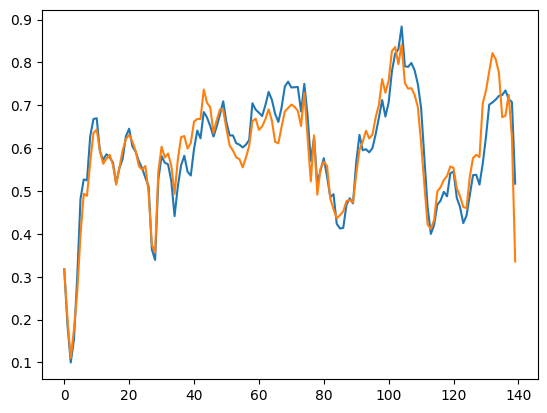

In [ ]:
plt.plot(normal_train[0])
plt.plot(normal_train[1])


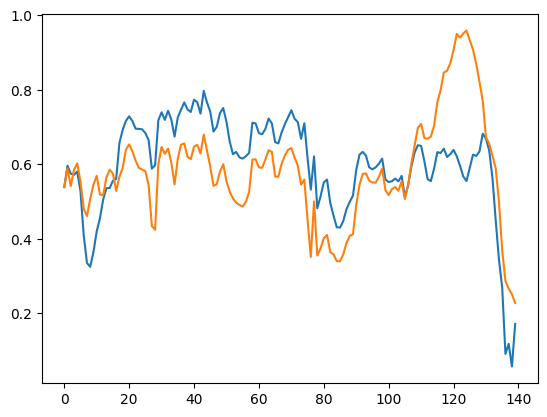

In [ ]:
plt.plot(anamoly_train[0])
plt.plot(anamoly_train[1])

In [ ]:
class autoencoder(Model):
  def __init__(self):
    super().__init__()
    self.encoder=tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu'),
    ])

    self.decoder=tf.keras.Sequential([
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(140,activation='sigmoid'),
  ])
  def call(self,X):
    encoded=self.encoder(X)
    decoded=self.decoder(encoded)
    return decoded

In [ ]:
model=autoencoder()
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min')
model.compile(optimizer='adam',loss='mae')

In [ ]:
history=model.fit(normal_train,normal_train,epochs=50,batch_size=128,validation_data=(scale_train_df.iloc[:,1:],scale_train_df.iloc[:,1:]),
                                                                                      shuffle=True,callbacks=[early_stopping])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1231 - val_loss: 0.1026
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0837 - val_loss: 0.0805
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - val_loss: 0.0760
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0474 - val_loss: 0.0752
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0460 - val_loss: 0.0747
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - val_loss: 0.0731
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - val_loss: 0.0715
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - val_loss: 0.0688
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - val_loss: 0.0665
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - val_loss: 0.0656
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375 - val_loss: 0.0644
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0369 - val_

In [ ]:
scale_train_df.shape

(4000, 141)

In [ ]:
encoded=model.encoder(normal_test).numpy()
decoded=model.decoder(encoded).numpy()

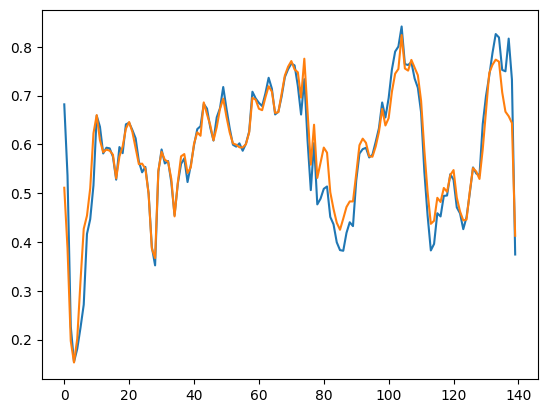

In [ ]:
plt.plot(normal_test[0])
plt.plot(decoded[0])

In [ ]:
encoded=model.encoder(anamoly_test).numpy()
decoded=model.decoder(encoded).numpy()

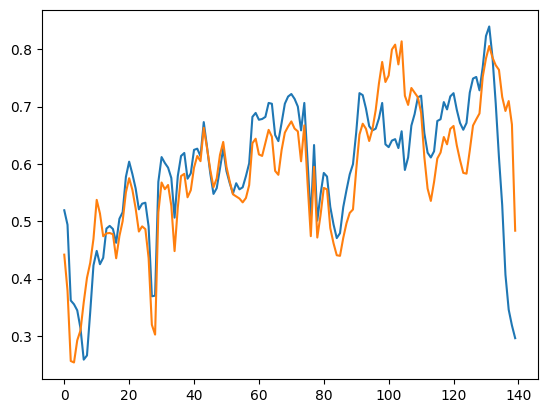

In [ ]:
plt.plot(anamoly_test[0])
plt.plot(decoded[0])

In [ ]:
reconstructions=model.predict(normal_test)
train_loss=tf.keras.losses.mae(reconstructions,normal_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


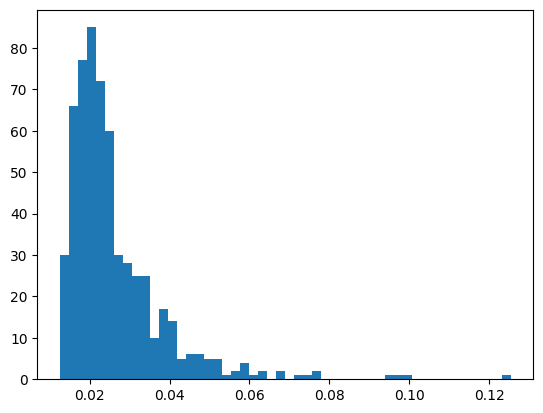

In [ ]:
plt.hist(train_loss,bins=50)
plt.show()

In [ ]:
np.mean(train_loss)

0.026169163350633576

In [ ]:
np.std(train_loss)

0.012503609213816288

In [ ]:
threshold=np.mean(train_loss)+2*np.std(train_loss)
threshold

0.05117638177826615

In [ ]:
reconstructions=model.predict(anamoly_test)
train_loss_a=tf.keras.losses.mae(reconstructions,anamoly_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


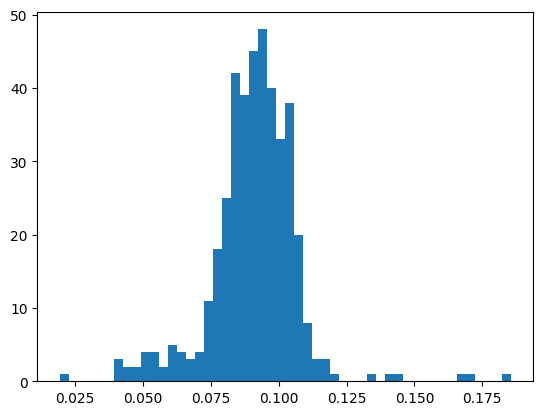

In [ ]:
plt.hist(train_loss_a,bins=50)
plt.show()

In [ ]:
np.mean(train_loss_a)
np.std(train_loss)
threshold_a=np.mean(train_loss_a)+2*np.std(train_loss_a)
threshold_a

0.12353308189756626

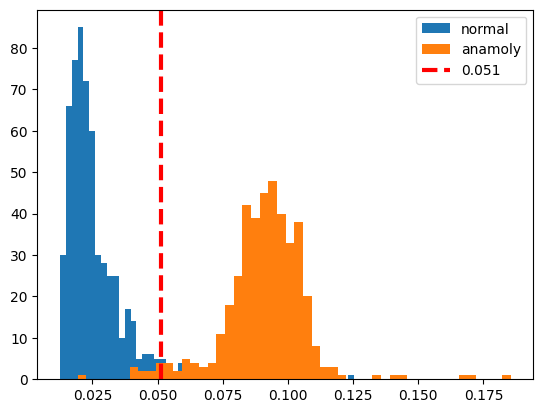

In [ ]:
plt.hist(train_loss,bins=50,label='normal')
plt.hist(train_loss_a,bins=50,label='anamoly')
plt.axvline(threshold,color='r',linewidth=3,linestyle='dashed',label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [ ]:
preds=tf.math.less(train_loss,threshold)

In [ ]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=561>

In [ ]:
preds.shape

TensorShape([586])

In [ ]:
preds_a=tf.math.greater(train_loss_a,threshold)

In [ ]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=405>

In [ ]:
preds_a.shape

TensorShape([414])